In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as snp
import datetime as dt
%matplotlib inline

In [2]:
covid_train_data = pd.read_csv('train.csv')

In [3]:
covid_train_data.head(5)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
covid_test_data = pd.read_csv('test.csv')

In [5]:
covid_test_data.head(5)

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [19]:
covid_train_data.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,month,year,day
count,17040.00000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.0,17040.000000
mean,13190.00000,26.287693,4.766191,285.089613,9.829167,2.183333,2020.0,15.516667
std,7624.68379,22.935124,79.923372,3318.442133,148.005703,0.695042,0.0,8.684516
min,1.00000,-41.454500,-157.498300,0.000000,0.000000,1.000000,2020.0,1.000000
25%,6595.50000,13.145425,-71.516375,0.000000,0.000000,2.000000,2020.0,8.000000
50%,13190.00000,32.985550,9.775000,0.000000,0.000000,2.000000,2020.0,15.500000
75%,19784.50000,42.501575,64.688975,9.000000,0.000000,3.000000,2020.0,23.000000
max,26379.00000,71.706900,174.886000,67800.000000,4825.000000,3.000000,2020.0,31.000000


In [6]:
covid_train_data = covid_train_data.dropna(axis=1)
covid_test_data = covid_test_data.dropna(axis=1)

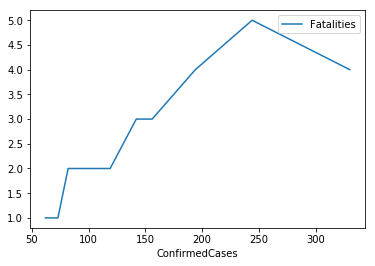

In [7]:
covid_train_data[(covid_train_data['Country/Region'] == 'India') & covid_train_data['Fatalities'] != 0].plot(kind='line', x='ConfirmedCases', y='Fatalities')

In [8]:
covid_train_data[covid_train_data['ConfirmedCases'] == 67800]['Country/Region'].unique()

array(['China'], dtype=object)

In [9]:
filtered_data = covid_train_data.groupby('Date').sum()

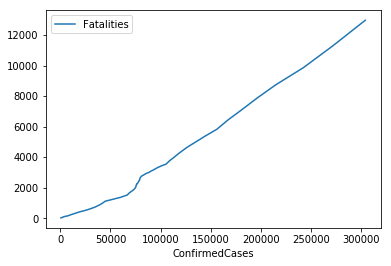

In [10]:
filtered_data.plot(kind='line', x='ConfirmedCases', y='Fatalities')

In [11]:
china_data = covid_train_data[covid_train_data['Country/Region'] == 'China'].groupby('Date').sum()

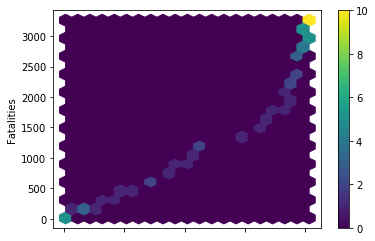

In [12]:
china_data.plot.hexbin(x='ConfirmedCases', y='Fatalities', gridsize=20, cmap='viridis')

In [13]:
# countries with having Fatalities > 10
fatal_data = covid_train_data[covid_train_data['Fatalities'] > 10].groupby('Country/Region').sum()

In [14]:
fatal_data.reset_index(inplace=True)

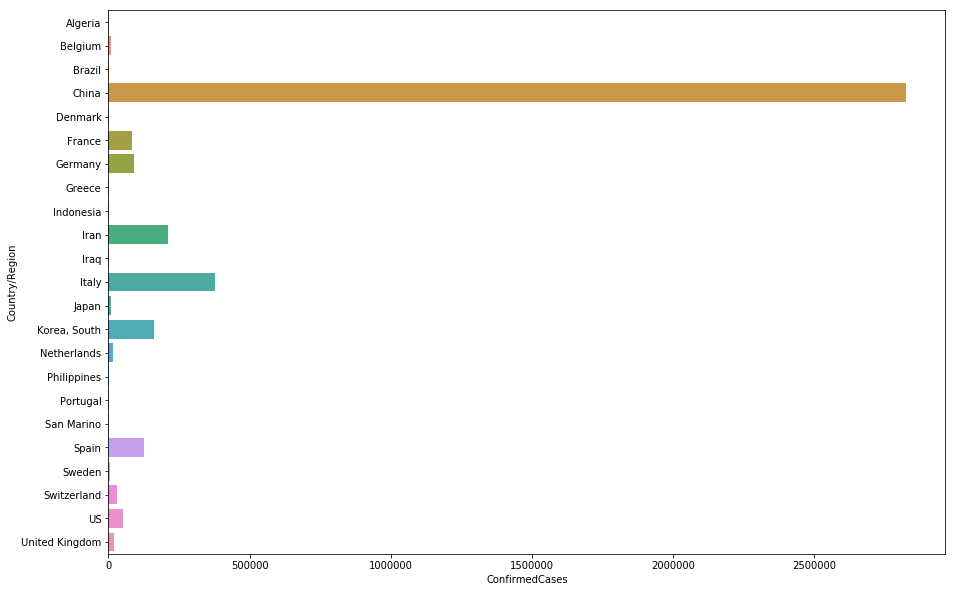

In [15]:
plt.figure(figsize=(15,10))
snp.barplot(y='Country/Region', x='ConfirmedCases', data=fatal_data)

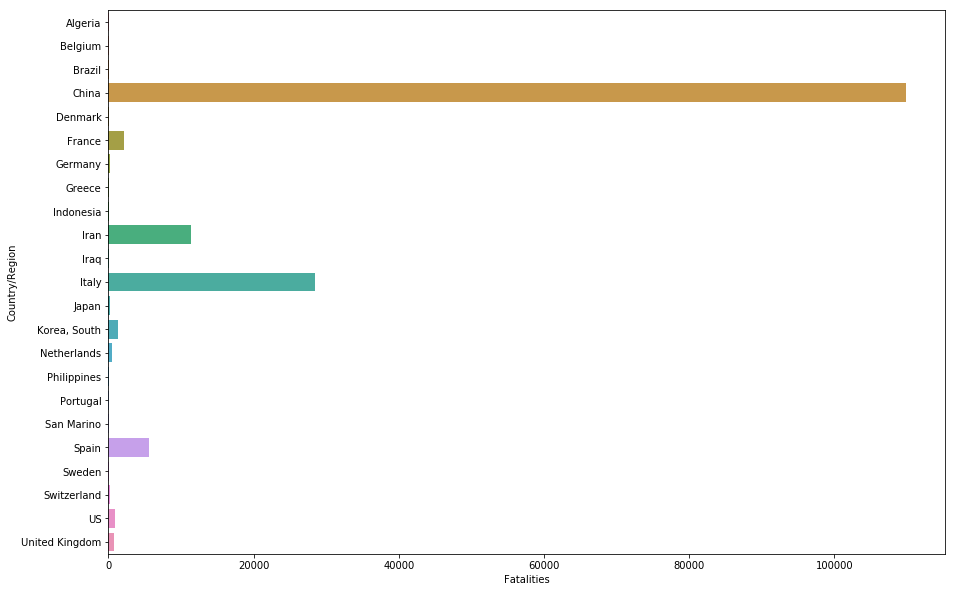

In [16]:
plt.figure(figsize=(15,10))
snp.barplot(y='Country/Region', x='Fatalities', data=fatal_data)

In [17]:
covid_train_data['month'] = pd.DatetimeIndex(covid_train_data['Date']).month
covid_train_data['year'] = pd.DatetimeIndex(covid_train_data['Date']).year
covid_train_data['day'] = pd.DatetimeIndex(covid_train_data['Date']).day
covid_train_data.drop('Date', axis=1, inplace=True)
# -- TEST -- #
covid_test_data['month'] = pd.DatetimeIndex(covid_test_data['Date']).month
covid_test_data['year'] = pd.DatetimeIndex(covid_test_data['Date']).year
covid_test_data['day'] = pd.DatetimeIndex(covid_test_data['Date']).day
covid_test_data.drop('Date', axis=1, inplace=True)

In [18]:
X = covid_train_data.drop(['Country/Region', 'ConfirmedCases', 'Fatalities'], axis=1)
y1 = covid_train_data['ConfirmedCases']
y2 = covid_train_data['Fatalities']
x_test = covid_test_data.drop('Country/Region', axis=1)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor(n_estimators=100)

In [22]:
model.fit(X, y1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
prediction = model.predict(x_test)

In [31]:
predicted_data = pd.DataFrame(prediction)

In [33]:
predicted_data.columns = ['ConfirmedCasesPrediction']

In [35]:
new_model = RandomForestRegressor(n_estimators=100)

In [36]:
new_model.fit(X, y2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
fatalities_prediction = new_model.predict(x_test)

In [46]:
fatal_pred = pd.DataFrame(fatalities_prediction)

In [47]:
fatal_pred.columns = ['FatalitiesPrediction']

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
submission_data = pd.concat([x_test['ForecastId'], predicted_data, fatal_pred], axis=1)

In [67]:
submission_data['FatalitiesPrediction'] = submission_data['FatalitiesPrediction'].astype(int)
submission_data['ConfirmedCasesPrediction'] = submission_data['ConfirmedCasesPrediction'].astype(int)

In [73]:
submission_data.to_csv('submission.csv', index=False)

In [84]:
submission_data['FatalitiesPrediction'].max()

3013